In [66]:
import cv2 as cv
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### `Calchist`의 구조

In [53]:
import os

img_path = os.getenv('HOME')+'/workspace/Modulabs-Dasol/Study/assets/cifar-100-python/images'

In [58]:
def draw_hist(filename):
    ori_img = os.path.join(img_path, filename)
    
    #이미지 열기
    img = cv.imread(ori_img)
    img_ = Image.open(ori_img)

    #이미지 그리기
    fig = plt.figure(figsize=(15, 8))
    image = fig.add_subplot(1,2,1)
    image.imshow(img_)
    image.set_title("Image")
    
    #히스토그램 그리기
    hist = fig.add_subplot(1,2,2)
    color = ('b','g','r') #opencv에서는 BGR 채널 순서
    
    for i,col in enumerate(color):
        # image에서 i번째 채널의 히스토그램을 뽑아서(0:blue, 1:green, 2:red)
        histogram = cv.calcHist([img],[i],None,[256],[0,256])   
        hist.plot(histogram,color = col)   # 그래프를 그릴때 채널 색상과 맞춰서 그립니다.
    
    hist.set_title("Histogram")

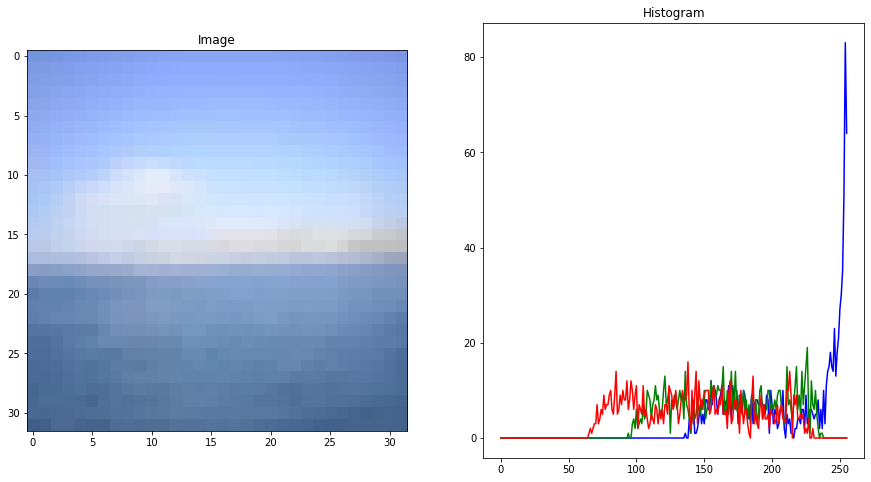

In [59]:
draw_hist('adriatic_s_001807.png')

`calcHist()`

```
hist = cv.calcHist(images, channels, mask, histSize[], ranges[,])
```

* images : unit8 또는 float32 타입의 `[]`(배열) 타입의 이미지
* channels : 히스토그램을 계산할 채널 수. grayscale 이미지라면 0, RGB(컬러) 이미지라면 3
* mask : 히스토그램을 구할 영역에 대한 마스크. 전체 이미지에 대한 히스토그램을 구할 경우 `None`.
* histSize : 히스토그램을 계산할 막대(bin)의 개수. 전체 영역에 대한 히스토그램을 계산할 경우 `256`이다.
* ranges : 히스토그램을 계산할 범위. 전체 픽셀 강도 범위를 계산한다면 `[0,256]`

히스토그램이란?

이미지는 픽셀 단위로 픽셀값(전문 용어로 픽셀 **강도**)를 갖는다. 예를 들어, 이미지의 검정색 부분의 픽셀은 0의 강도를, 흰색 부분의 픽셀은 255의 강도를 갖는다. **히스토그램은 이 픽셀 강도가 얼마나 자주 등장하는지 frequency를 계산한 것이다.**

* 8비트 이미지의 픽셀 강도는 **0~255**의 값이다.
* 히스토그램은 픽셀 강도에 대한 빈도이므로, 전체 영역에 대한 히스토그램을 계산할 경우 `hizeSize`가 256인것이다.
* 전체 픽셀 강도를 계산할 경우 `range`값이 [0, 256]인데, 여기서 코드상으로 `0<=x<256`의 의미를 갖기 때문에 범위가 256까지이다.
    * range를 [128,256]이라고 지정하면 중간값~밝은값의 픽셀 빈도수를 계산하는 것.
    * 이처럼 필요한 특정 색상에 대한 빈도값만 추출할 수 있다.
* opencv의 `calcHist()`는 픽셀 강도의 빈도수를 계산해서 반환한다. 이를 시각화하기 위해서는 보여주는 함수(`plot` 혹은 `imshow` 등)가 필요하다.

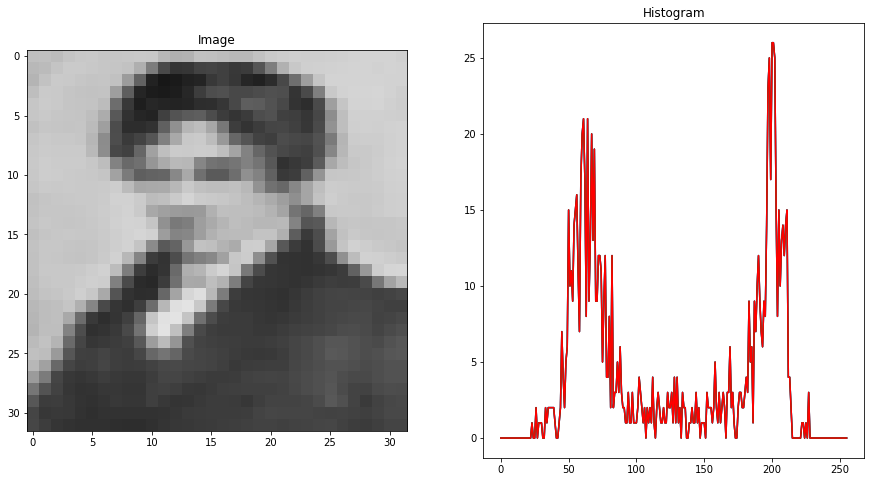

In [60]:
draw_hist('abel_s_000001.png')

## 히스토그램 구하기
* 고려 사항 : 픽셀 강도 범위(range), 막대 개수(dims), 막대 범위(bins)

* 예시 1 : 픽셀 강도가 0 ~ 3인 픽셀 개수가 12개, 픽셀 강도가 4 ~ 7인 픽셀 개수가 28개, 픽셀 강도가 8 ~ 11인 픽셀 개수가 20개, 픽셀 강도가 12 ~ 15인 픽셀 개수가 4개

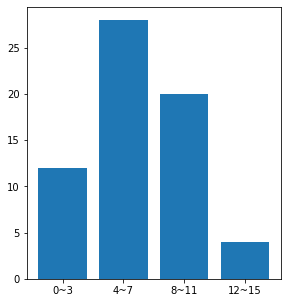

In [63]:
pixel = ['0~3', '4~7', '8~11', '12~15']
freq = [12, 28, 20, 4]
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax.bar(pixel, freq)
plt.show()

In [ ]:
# def draw_histogram(img):
#     h = np.zeros((img.shape[0], 256), dtype=uint8)
    
#     hist_item = cv.calcHist([img], [0], None, [256], [0,256])
#     cv.normalize(hist_item, hist_item, 0, 255, cv.NORM_MINMAX)
#     hist=np.int32(np.around(hist_item))
    
#     for x,y in enumerate(hist):
#         cv.line(h,(x,0+10),(x,y+10),(255,255,255))

#     cv.line(h, (0, 0 + 10), (0, 5), (255, 255, 255) )
#     cv.line(h, (255, 0 + 10), (255, 5), (255, 255, 255))
    
#     y = np.flipud(h)

#     return y

In [ ]:
# img = cv.imread('./Study/assets/Dasol.jpg', cv.IMREAD_COLOR)
# img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# line = draw_histogram(img_gray)
# res = np.hstack((img_gray, line))
# cv.imshow('image', res)

# cv.waitKey(0)
# cv.destroyAllWindows()